In [14]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

from sklearn.cluster import KMeans
from sklearn.metrics import fowlkes_mallows_score, rand_score, adjusted_rand_score, v_measure_score, \
	silhouette_score, calinski_harabasz_score, davies_bouldin_score

import matplotlib.pyplot as plt
import matplotlib
import sklearn as sk

import numpy as np
import math
from time import time

In [ ]:
def load_data(root_path, suffix) -> tuple[np.ndarray, np.ndarray]:
    X = np.loadtxt(f"{root_path}/X_{suffix}.txt")
    y = np.loadtxt(f"{root_path}/y_{suffix}.txt")
    return X, y

def load_label_name(root_path) -> dict[int, str] :
    with open(f"{root_path}/activity_labels.txt", "r") as f:
        lines = f.readlines()
        label_name = {}
        for line in lines:
            line = line.strip().split()
            label_name[int(line[0])] = line[1]
    
    return label_name

def label_binarize(y) -> np.ndarray :
    global handler
    if "handler" not in globals() or handler is None :
        handler = LabelBinarizer()
        _, y_train = load_data("./data/train", "train")
        handler.fit(y_train)
    
    return handler.transform(y)

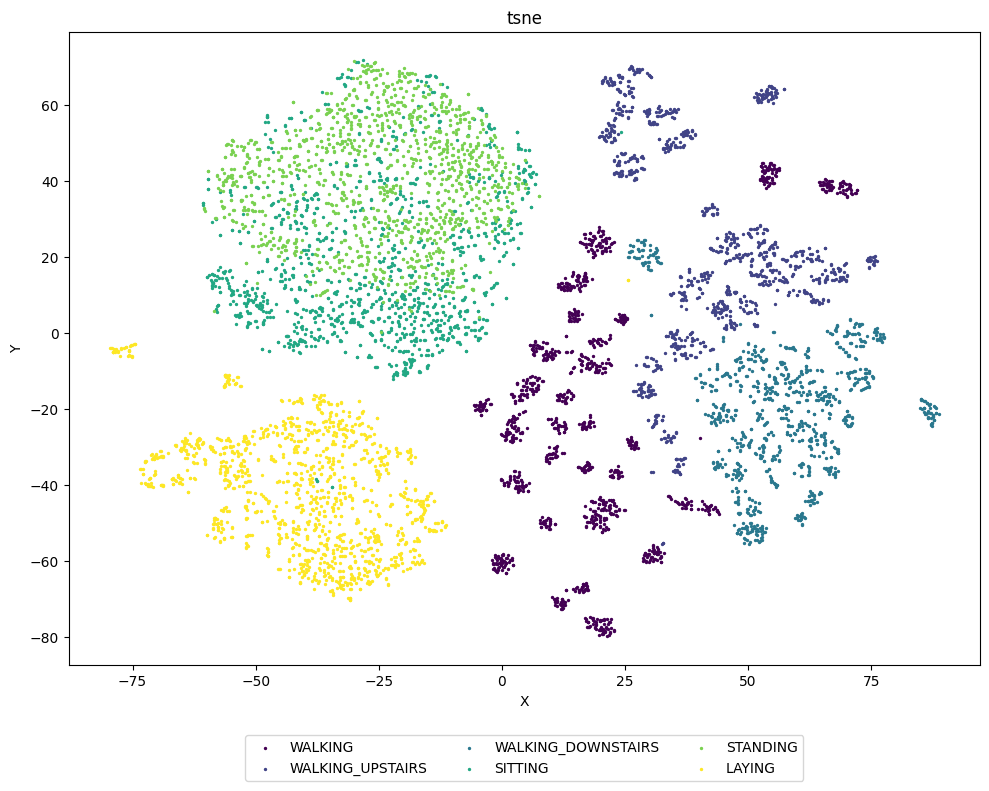

In [ ]:
def dimension_reduction(x, dim_target = 3, algorithm = "PCA") :
    if algorithm == "PCA" :
        pca = sk.decomposition.PCA(n_components=dim_target)
        x = pca.fit_transform(x)
    elif algorithm == "TSNE" :
        tsne = sk.manifold.TSNE(n_components=dim_target)
        x = tsne.fit_transform(x)

    return x

def get_label_color(label) :
    global colormap, y_min, y_max
    if "colormap" not in globals() :
        colormap = matplotlib.cm.get_cmap("viridis")
        _, y_train = load_data("./data/train", "train")
        y_min = np.min(y_train)
        y_max = np.max(y_train)

    return colormap((label - y_min) / (y_max - y_min))

def plot(
        x = list[np.ndarray] | np.ndarray, 
        y = list[np.ndarray] | np.ndarray, 
        dim_target : int | list[int] = 3, 
        name : list[str] | str | None = None,
        label : dict[str] | None = None,
        save_path = None,
        ) :
    
    if type(x) == np.ndarray : x = [x]
    if type(y) == np.ndarray : y = [y] * len(x)
    if type(dim_target) == int : dim_target = [dim_target] * len(x)
    if type(name) == str : name = [name] * len(x)

    if len(x) != len(y) or len(x) != len(dim_target) :
        raise ValueError("x, y, dim_target, need_dimension_reduction must have the same length")
    
    nrow = 1 if len(x) <= 3 else 2
    ncol = int(math.ceil(len(x) / nrow))

    fig = plt.figure(figsize=(10, 8))

    if name is None :
        name = [f"Plot {i}" for i in range(len(x))]

    # write each plot in a different subplot
    for i in range(len(x)) :
        
        if dim_target[i] == 2 :
            ax = fig.add_subplot(nrow, ncol, i + 1)
            if label is not None :
                y_min = np.min(y[i])
                y_max = np.max(y[i])

                cmap = matplotlib.colormaps.get_cmap('viridis')
                colors = [cmap((i - y_min) / (y_max - y_min)) for i in range(int(y_min), int(y_max) + 1)]
                for j in range(int(y_min), int(y_max) + 1) :
                    ax.scatter(x[i][y[i] == j, 0], x[i][y[i] == j, 1], s=2, color=colors[j - int(y_min)], label=label[j])
            else :
                ax.scatter(x[i][:, 0], x[i][:, 1], c=y[i], s=2)
        elif dim_target[i] == 3 :
            ax = fig.add_subplot(nrow, ncol, i + 1, projection='3d')
            if label is not None :
                y_min = np.min(y[i])
                y_max = np.max(y[i])

                cmap = matplotlib.colormaps.get_cmap('viridis')
                colors = [cmap((i - y_min) / (y_max - y_min)) for i in range(int(y_min), int(y_max) + 1)]
                for j in range(int(y_min), int(y_max) + 1) :
                    ax.scatter(x[i][y[i] == j, 0], x[i][y[i] == j, 1], x[i][y[i] == j, 2], s=2, color=colors[j - int(y_min)], label=label[j])
            else :
                ax.scatter(x[i][:, 0], x[i][:, 1], x[i][:, 2], c=y[i], s=2)
            
            ax.set_zlabel("Z")

        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_title(name[i])
        if label is not None :
            ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
    plt.tight_layout()

    if save_path is not None :
        plt.savefig(save_path, dpi=300)
    else :
        plt.show()

if __name__ == "__main__" :
    X, y = load_data("./data/train", "train")
    X_tsne = dimension_reduction(X, 2, "TSNE")
    X_pca = dimension_reduction(X, 2, "PCA")
    plot([X_tsne], [y], dim_target=2, name="tsne", label=load_label_name("./data"))

metric of kmeans orginal
external metric: 
	fowlkes_mallows score : 0.5562077976023196
	rand score : 0.8382731343577425
	adjusted rand score : 0.4566413551282317
	v measure score : 0.5843990593175667
internal metric: 
	silhouette score : 0.14659285989864657
	calinski harabasz score : 3103.205667808008
	davies bouldin score : 2.1652306995930393

metric of kmeans dimension reduction
external metric: 
	fowlkes_mallows score : 0.7091572419080203
	rand score : 0.901631194944497
	adjusted rand score : 0.6499623997036061
	v measure score : 0.7305169130196082
internal metric: 
	silhouette score : 0.3944060504436493
	calinski harabasz score : 7816.52685546875
	davies bouldin score : 0.9025860680618601

metric of hierarchical orginal
external metric: 
	fowlkes_mallows score : 0.6012982642784007
	rand score : 0.8561175972001767
	adjusted rand score : 0.5128694931363761
	v measure score : 0.6524080662014535
internal metric: 
	silhouette score : 0.1088388168124978
	calinski harabasz score : 2941.24

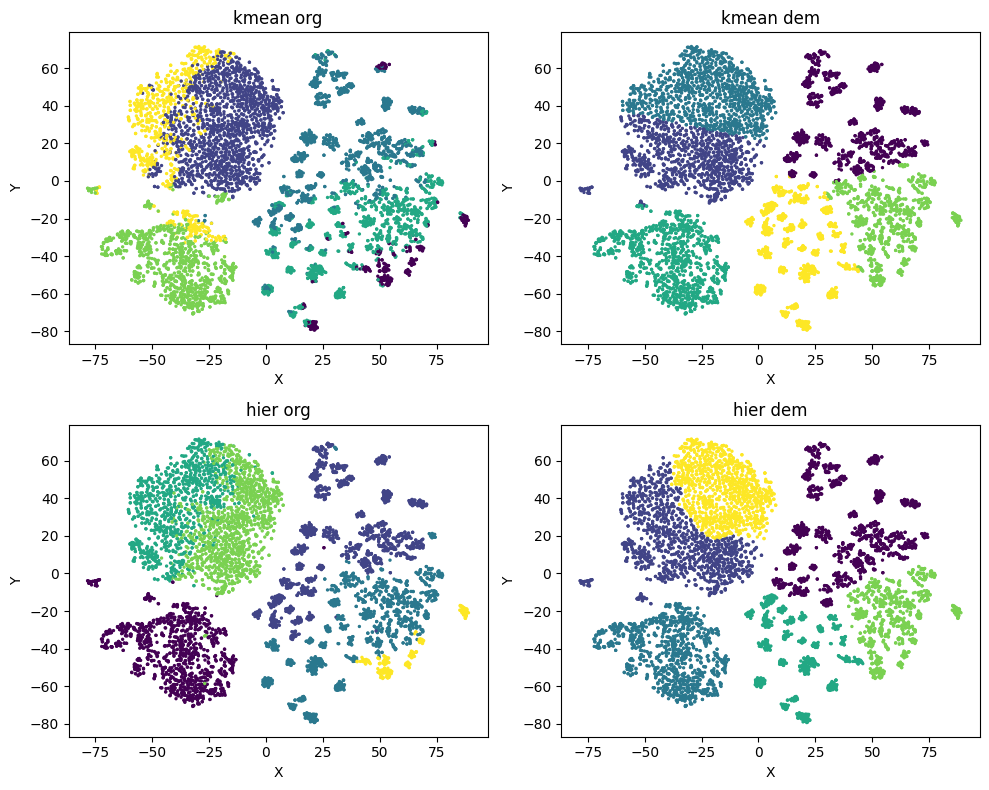

In [ ]:
def kmeans(X : np.ndarray, n_clusters: int, n_init: int = 10) -> tuple :
	km = KMeans(n_clusters=n_clusters, n_init=n_init, max_iter=600)

	km.fit(X)

	return km.labels_, km.cluster_centers_

def hierarchical(X : np.ndarray, n_clusters: int) -> tuple :
	from sklearn.cluster import AgglomerativeClustering

	ag = AgglomerativeClustering(n_clusters=n_clusters)

	ag.fit(X)

	return ag.labels_, ag.children_

def metric(name : str, X : np.ndarray, y : np.ndarray, labels : np.ndarray, centers : np.ndarray) :
	print(f"metric of {name}")

	print("external metric: ")

	# fowlkes_mallows score
	print(f"\tfowlkes_mallows score : {fowlkes_mallows_score(y, labels)}")

	# rand score
	print(f"\trand score : {rand_score(y, labels)}")

	# adjusted rand score
	print(f"\tadjusted rand score : {adjusted_rand_score(y, labels)}")

	# v measure score
	print(f"\tv measure score : {v_measure_score(y, labels)}")

	print("internal metric: ")

	# silhouette score
	print(f"\tsilhouette score : {silhouette_score(X, labels)}")

	# calinski harabasz score
	print(f"\tcalinski harabasz score : {calinski_harabasz_score(X, labels)}")
	# davies bouldin score
	print(f"\tdavies bouldin score : {davies_bouldin_score(X, labels)}")

	print()



if __name__ == "__main__" :
	X, y = load_data("./data/train", "train")

	x_dem = dimension_reduction(X, 2, "TSNE")

	labels_kmeans_dem, centers_kmeans_dem = kmeans(x_dem, 6, 20)
	# cluster using the orginal data
	labels_kmeans_org, centers_kmeans_org = kmeans(X, 6, 20)

	labels_hierarchical_dem, children_hierarchical_dem = hierarchical(x_dem, 6)
	# cluster using the orginal data
	labels_hierarchical_org, children_hierarchical_org = hierarchical(X, 6)
	
	metric("kmeans orginal", X, y, labels_kmeans_org, centers_kmeans_org)
	metric("kmeans dimension reduction", x_dem, y, labels_kmeans_dem, centers_kmeans_dem)

	metric("hierarchical orginal", X, y, labels_hierarchical_org, children_hierarchical_org)
	metric("hierarchical dimension reduction", x_dem, y, labels_hierarchical_dem, children_hierarchical_dem)

	# plot the clusters
	plot(
		[x_dem, x_dem, x_dem, x_dem], 
		[labels_kmeans_org, labels_kmeans_dem, labels_hierarchical_org, labels_hierarchical_dem], 
		dim_target=2, 
		name=["kmean org", "kmean dem", "hier org", "hier dem"])

metric of Logistic Regression :
time cost : 2.28 s
accuracy : 0.9582626399728538
              precision    recall  f1-score   support

         1.0       0.96      0.99      0.97       496
         2.0       0.96      0.96      0.96       471
         3.0       0.99      0.95      0.97       420
         4.0       0.94      0.89      0.92       491
         5.0       0.91      0.95      0.93       532
         6.0       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947

confusion matrix :
[[491   3   2   0   0   0]
 [ 19 450   2   0   0   0]
 [  3  16 401   0   0   0]
 [  0   2   0 439  49   1]
 [  0   0   0  26 506   0]
 [  0   0   0   0   0 537]]


/var/folders/x2/781dzr6x67d1nh5nfghk_5k40000gp/T/ipykernel_15411/1699735640.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = matplotlib.cm.get_cmap("viridis")



metric of Ridge Regression :
time cost : 0.04 s
accuracy : 0.9569053274516457
              precision    recall  f1-score   support

         1.0       0.97      0.99      0.98       496
         2.0       0.97      0.98      0.97       471
         3.0       1.00      0.98      0.99       420
         4.0       0.96      0.87      0.91       491
         5.0       0.86      0.96      0.91       532
         6.0       1.00      0.96      0.98       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947

confusion matrix :
[[491   5   0   0   0   0]
 [ 11 460   0   0   0   0]
 [  2   7 411   0   0   0]
 [  0   2   0 429  60   0]
 [  0   0   0  20 512   0]
 [  0   0   0   0  20 517]]

metric of SVC :
time cost : 7.93 s
accuracy : 0.9521547336274178
              precision    recall  f1-score   support

         1.0       0.96      0.97      0.97       496
         2.0       0.

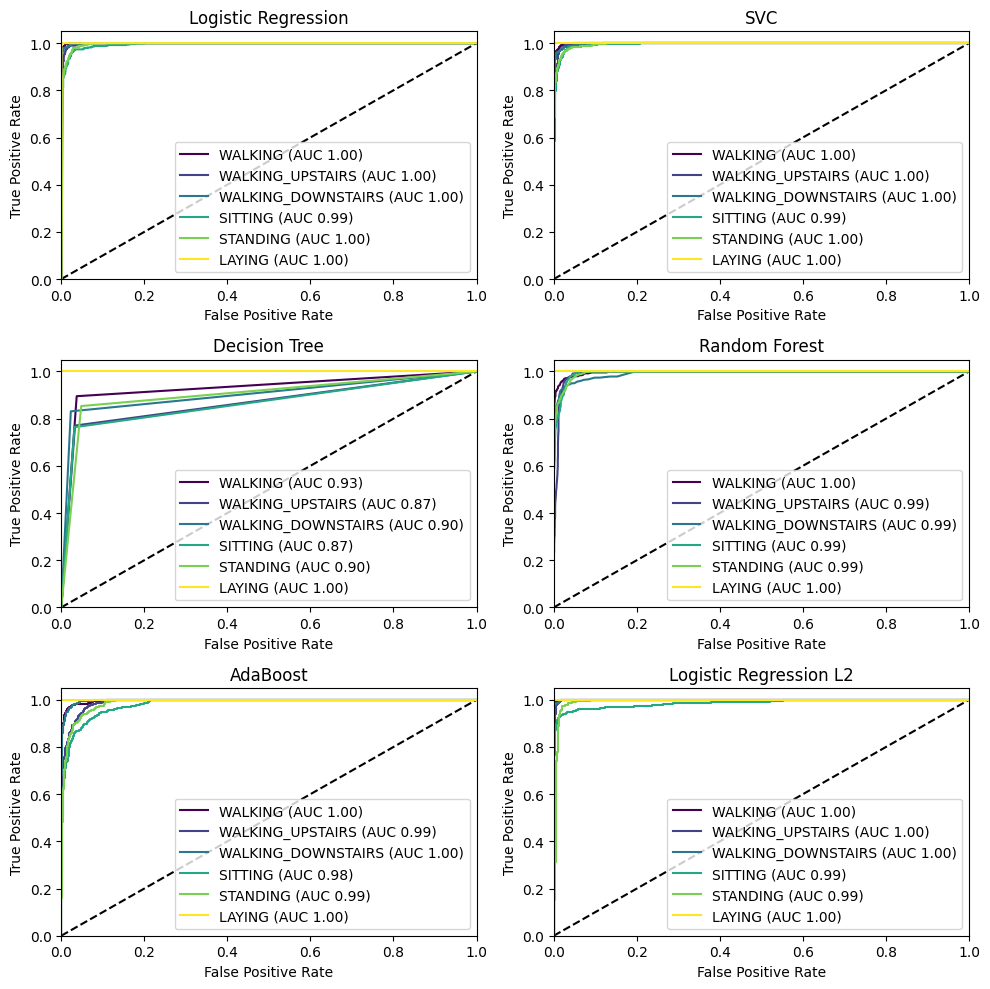

In [ ]:
best_model = None
best_accuracy = 0

fig = plt.figure(figsize=(10, 10))
nrow, ncol = 3, 2
idx = 0

def evaluate(name, 
			 model : LogisticRegression | DecisionTreeClassifier | RandomForestClassifier | AdaBoostClassifier | GradientBoostingClassifier,
			 X_test, y_test, time_cost=None, eval_roc : bool = False) :
	global best_model, best_accuracy, ncol, nrow, idx
	print(f"metric of {name} :")

	y_pred = model.predict(X_test)

	print(f"time cost : {time_cost:.2f} s")
	acc = accuracy_score(y_test, y_pred)
	print(f"accuracy : {acc}")
	# update best model
	if best_model is None or best_accuracy < acc :
		best_model = model
		best_accuracy = acc

	print(classification_report(y_test, y_pred))

	print(f"confusion matrix :\n{confusion_matrix(y_test, y_pred)}")

	# draw AUC and ROC curve
	if eval_roc :
		classes_dict = load_label_name("./data")
		classes = list(classes_dict.keys())

		y_test_bin = label_binarize(y_test)
		y_score = model.predict_proba(X_test)

		fpr, tpr, roc_auc = {}, {}, {}
		for i, cls in enumerate(classes) :
			fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
			roc_auc[i] = auc(fpr[i], tpr[i])

		# draw ROC curve
		ax = fig.add_subplot(nrow, ncol, idx + 1)
		ax.plot([0, 1], [0, 1], 'k--')
		ax.set_xlim([0.0, 1.0])
		ax.set_ylim([0.0, 1.05])
		ax.set_xlabel('False Positive Rate')
		ax.set_ylabel('True Positive Rate')
		ax.set_title(name)
		for i, cls in enumerate(classes) :
			ax.plot(fpr[i], tpr[i], label=f"{classes_dict[cls]} (AUC {roc_auc[i]:.2f})", color=get_label_color(cls))
		ax.legend(loc='lower right')

		idx += 1

	print()
def pred_logistic(X_train, y_train, X_test, y_test):
	st_time = time()
	# Logistic Regression
	lr = LogisticRegression(C=1e9, max_iter=1000)
	lr.fit(X_train, y_train)
	time_cost = time() - st_time
	
	evaluate("Logistic Regression", lr, X_test, y_test, time_cost, eval_roc=True)

def pred_ridge(X_train, y_train, X_test, y_test):
	st_time = time()
	# Linear Regression
	lr = RidgeClassifier()
	lr.fit(X_train, y_train)
	time_cost = time() - st_time
	
	evaluate("Ridge Regression", lr, X_test, y_test, time_cost)

def pred_dt(X_train, y_train, X_test, y_test):
	st_time = time()

	scaler = StandardScaler()
	X_train = scaler.fit_transform(X_train.data)
	X_test = scaler.transform(X_test.data)
	dt = DecisionTreeClassifier()
	dt.fit(X_train, y_train)
	time_cost = time() - st_time
	
	evaluate("Decision Tree", dt, X_test, y_test, time_cost, eval_roc=True)

def pred_rf(X_train, y_train, X_test, y_test):
	st_time = time()
	scaler = StandardScaler()
	X_train = scaler.fit_transform(X_train.data)
	X_test = scaler.transform(X_test.data)

	# Random Forest
	rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
	rf.fit(X_train, y_train)
	time_cost = time() - st_time
	
	evaluate("Random Forest", rf, X_test, y_test, time_cost, eval_roc=True)

def pred_ab(X_train, y_train, X_test, y_test):
	st_time = time()
	scaler = StandardScaler()
	X_train = scaler.fit_transform(X_train.data)
	X_test = scaler.transform(X_test.data)

	# AdaBoost
	ab = AdaBoostClassifier(n_estimators=100, estimator=DecisionTreeClassifier(max_depth=3))
	ab.fit(X_train, y_train)
	time_cost = time() - st_time	

	evaluate("AdaBoost", ab, X_test, y_test, time_cost, eval_roc=True)

def pred_svc(X_train, y_train, X_test, y_test):
	st_time = time()
	scaler = StandardScaler()
	X_train = scaler.fit_transform(X_train.data)
	X_test = scaler.transform(X_test.data)

	# SVC
	svc = SVC(probability=True)
	svc.fit(X_train, y_train)
	time_cost = time() - st_time
	
	evaluate("SVC", svc, X_test, y_test, time_cost, eval_roc=True)

# finetune the logistic regression
def finetune_logistic(X_train, y_train, X_test, y_test):
	lr_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
	lr_l2 = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000)
	lr_l2_2 = LogisticRegression(penalty='l2', solver='saga', max_iter=1000)

	st_time = time()
	lr_l1.fit(X_train, y_train)
	time_cost1 = time() - st_time
	st_time = time()
	lr_l2.fit(X_train, y_train)
	time_cost2 = time() - st_time

	st_time = time()
	lr_l2_2.fit(X_train, y_train)
	time_cost2_2 = time() - st_time

	evaluate("Logistic Regression L1", lr_l1, X_test, y_test, time_cost1, eval_roc=False)
	evaluate("Logistic Regression L2", lr_l2, X_test, y_test, time_cost2, eval_roc=True)
	evaluate("Logistic Regression L2 (saga)", lr_l2_2, X_test, y_test, time_cost2_2, eval_roc=False)

if __name__ == "__main__":
	# Load the data
	X_train, y_train = load_data("./data/train", "train")

	X_test, y_test = load_data("./data/test", "test")

	# Standardize the data
	
	# Predict using different classifiers
	pred_logistic(X_train, y_train, X_test, y_test)
	pred_ridge(X_train, y_train, X_test, y_test)
	pred_svc(X_train, y_train, X_test, y_test)
	pred_dt(X_train, y_train, X_test, y_test)
	pred_rf(X_train, y_train, X_test, y_test)
	pred_ab(X_train, y_train, X_test, y_test)

	print(f"best model : {best_model}")
	print(f"best accuracy : {best_accuracy}")

	print(f"finetune logistic regression")
	finetune_logistic(X_train, y_train, X_test, y_test)

	plt.tight_layout()
	plt.savefig("./roc.png", dpi=300)
